<img src="Breast-Cancer-Logo.png" alt="Ehab Sabry" width="300" height="300">
                 

In [23]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns


# Load images Dataset  

In [2]:
normal_images_path = r"C:\Users\Lenovo\Desktop\BIO\normal"
benign_images_path = r"C:\Users\Lenovo\Desktop\BIO\benign"
malignant_images_path = r"C:\Users\Lenovo\Desktop\BIO\malignant"

In [3]:
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            labels.append(folder)
    return images, labels


In [4]:
normal_images, normal_labels = load_images(normal_images_path)
benign_images, benign_labels = load_images(benign_images_path)
malignant_images, malignant_labels = load_images(malignant_images_path)

images = normal_images + benign_images + malignant_images
labels = normal_labels + benign_labels + malignant_labels

# Encoding the Labels

In [5]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = np_utils.to_categorical(labels)

# Data Visualization

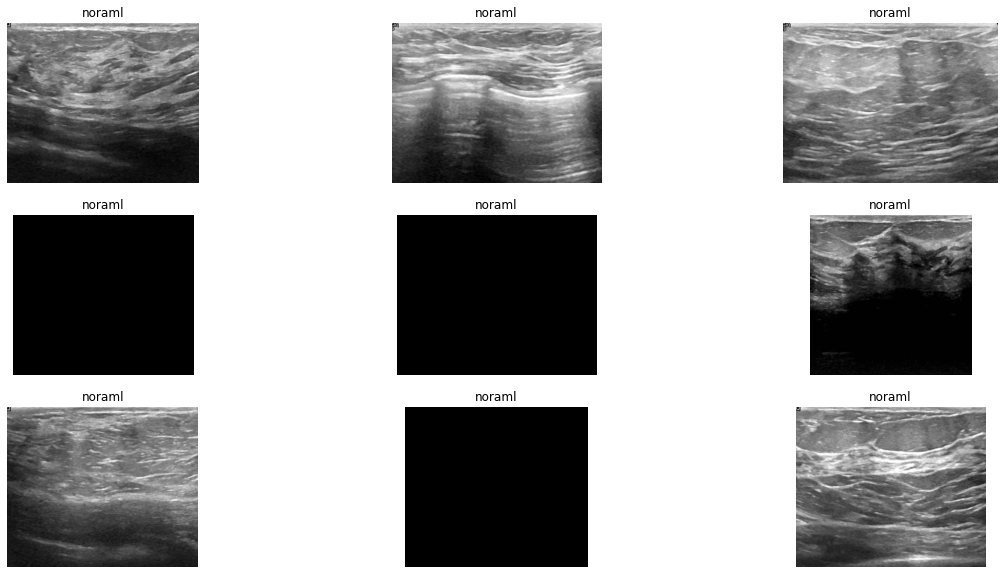

In [12]:
# Extract numpy values from Image column in data frame
data = normal_images

# Randomly select and visualize 9 images with labels
plt.figure(figsize=(20, 10))
for i in range(9):
    img = random.choice(data)
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('noraml')
    plt.axis('off')

plt.show()








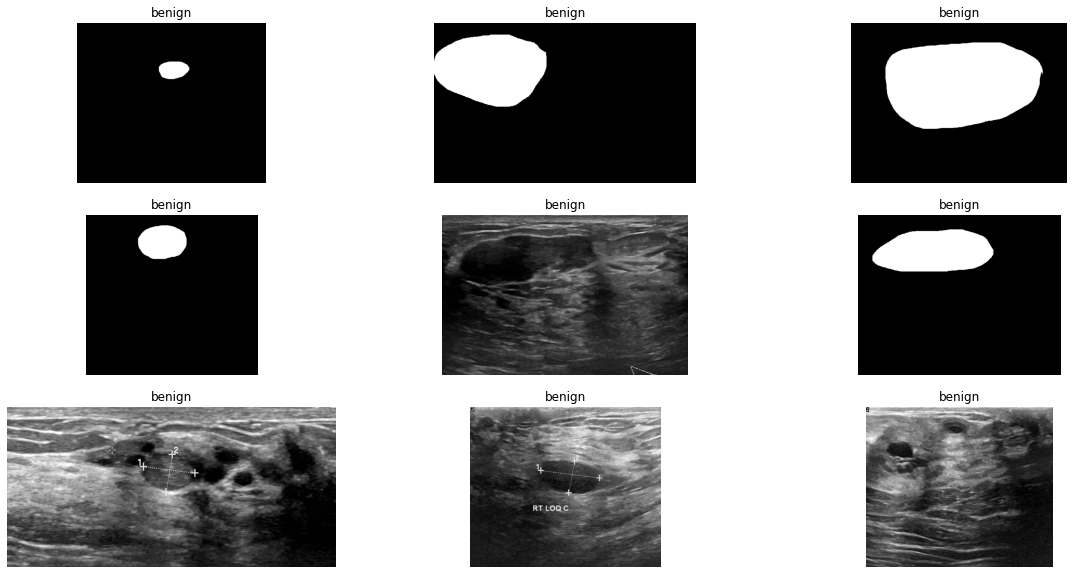

In [14]:
data3 = benign_images

# Randomly select and visualize 9 images with labels
plt.figure(figsize=(20, 10))
for i in range(9):
    img = random.choice(data3)
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('benign')
    plt.axis('off')

plt.show()

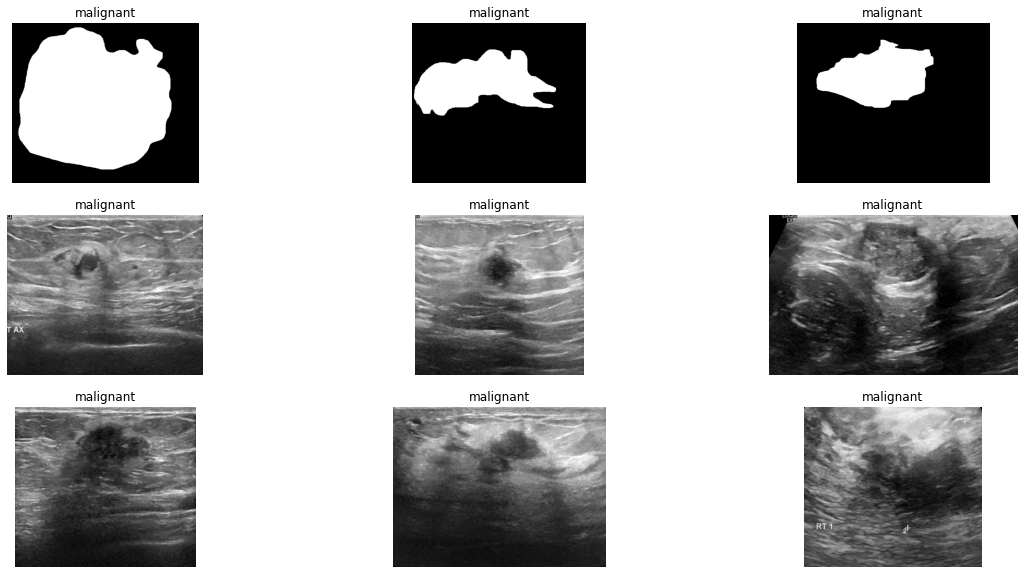

In [15]:
data2 = malignant_images

# Randomly select and visualize 9 images with labels
plt.figure(figsize=(20, 10))
for i in range(9):
    img = random.choice(data2)
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('malignant')
    plt.axis('off')

plt.show()

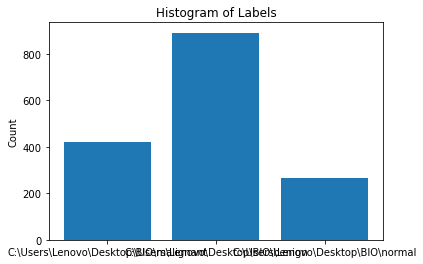

In [16]:
all_labels = normal_labels + benign_labels + malignant_labels

# Count the occurrences of each label
label_counts = {label: all_labels.count(label) for label in set(all_labels)}

# Plotting the histogram
plt.bar(label_counts.keys(), label_counts.values())

plt.ylabel('Count')
plt.title('Histogram of Labels')
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [18]:
X_train

[array([[[  4,   4,   4],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[201, 201, 201],
         [202, 202, 202],
         [171, 171, 171],
         ...,
         [244, 244, 244],
         [243, 243, 243],
         [244, 244, 244]],
 
        [[202, 202, 202],
         [200, 200, 200],
         [207, 207, 207],
         ...,
         [237, 237, 237],
         [235, 235, 235],
         [235, 235, 235]],
 
        ...,
 
        [[ 32,  32,  32],
         [ 31,  31,  31],
         [ 31,  31,  31],
         ...,
         [ 35,  35,  35],
         [ 35,  35,  35],
         [ 34,  34,  34]],
 
        [[ 32,  32,  32],
         [ 32,  32,  32],
         [ 32,  32,  32],
         ...,
         [ 38,  38,  38],
         [ 38,  38,  38],
         [ 38,  38,  38]],
 
        [[ 32,  32,  32],
         [ 33,  33,  33],
         [ 34,  34,  34],
         ...,
         [ 42,  42,  42],
  

# Data Preprocessing 

In [19]:
def preprocess_data(images):
    processed_images = []
    for img in images:
        
        img = cv2.resize(img, (224, 224))
        
        img = img.astype('float32') / 255.0
        processed_images.append(img)
    return np.array(processed_images)

X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)


In [20]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Building the CNN model 

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

          
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

          
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

          
model.add(Dense(3, activation='softmax'))


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11944000  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [76]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) // 32, epochs=40)


Epoch 1/40
39/39 [==============================] - 33s 790ms/step - loss: 0.6224 - accuracy: 0.7382
Epoch 2/40
39/39 [==============================] - 30s 753ms/step - loss: 0.5734 - accuracy: 0.7407
Epoch 3/40
39/39 [==============================] - 30s 767ms/step - loss: 0.5809 - accuracy: 0.7447
Epoch 4/40
39/39 [==============================] - 31s 792ms/step - loss: 0.5789 - accuracy: 0.7577
Epoch 5/40
39/39 [==============================] - 31s 787ms/step - loss: 0.5873 - accuracy: 0.7561
Epoch 6/40
39/39 [==============================] - 32s 823ms/step - loss: 0.5697 - accuracy: 0.7577
Epoch 7/40
39/39 [==============================] - 34s 865ms/step - loss: 0.5571 - accuracy: 0.7455
Epoch 8/40
39/39 [==============================] - 35s 898ms/step - loss: 0.5749 - accuracy: 0.7512
Epoch 9/40
39/39 [==============================] - 34s 878ms/step - loss: 0.5724 - accuracy: 0.7512
Epoch 10/40
39/39 [==============================] - 36s 922ms/step - loss: 0.5795 - accura

# evaluate the model

In [78]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 4s 192ms/step - loss: 0.4191 - accuracy: 0.8354
Test Loss: 0.41908589005470276
Test Accuracy: 0.8354430198669434


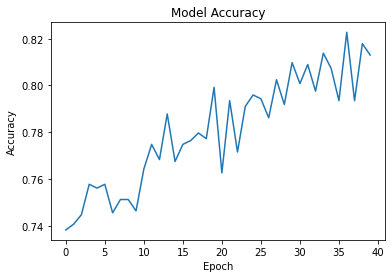

In [79]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

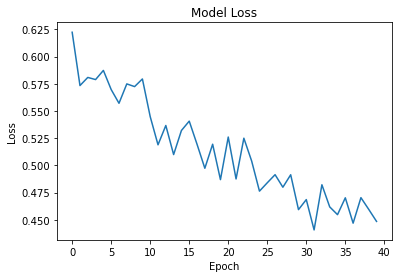

In [80]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

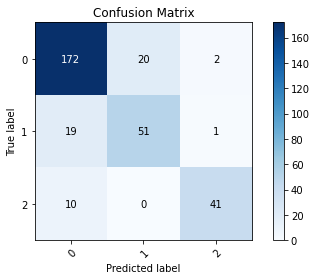

In [85]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
labels = unique_labels(y_true, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels,
       yticklabels=labels,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the x-axis tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

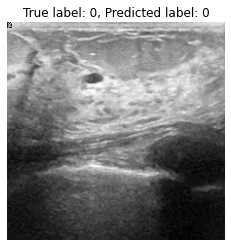

In [94]:
index = 45  # Change this value to select a different image
image = X_test[index]
true_label = np.argmax(y_test[index])

# Reshape the image to match the input shape of the model
image = np.expand_dims(image, axis=0)

# Make a prediction using the model
prediction = np.argmax(model.predict(image))

# Display the image and predicted class label
plt.imshow(image.squeeze())
plt.axis('off')
plt.title(f"True label: {true_label}, Predicted label: {prediction}")
plt.show()

***



<img src="png-transparent-breast-cancer-awareness-month-therapy-others-miscellaneous-text-logo-removebg-preview%20(1).png" alt="Ehab Sabry" width="500" height="500">
